<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Assignment%207%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 7 – EDA**- **Piramu M**

***Import the attached CSV files (IPL_Dataset.csv) ***

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df1 = pd.read_csv('IPL_Dataset.csv')

# Display the first few rows of the dataset
print(df1.head())

   Jersey No          Player  Matches  Inns  Not Out  Runs Highest Score  \
0          1        KL Rahul       14    14        2   670          132*   
1          2  Shikhar Dhawan       17    17        3   618          106*   
2          3    David Warner       16    16        2   548           85*   
3          4    Shreyas Iyer       17    17        2   519           88*   
4          5    Ishan Kishan       14    13        4   516            99   

     Avg  Balls faced  Strike rate  100  50  4s  6s  
0  55.83          518       129.34    1   5  58  23  
1  44.14          427       144.73    2   4  67  12  
2  39.14          407       134.64    0   4  52  14  
3  34.60          421       123.27    0   3  40  16  
4  57.33          354       145.76    0   4  36  30  


**Q1.What is the maximum number of matches played by an individual player in a season? Print the player name along with the number of matched played.**

In [3]:
max_matches = df1["Matches"].max()
top_player = df1[df1["Matches"] == max_matches][["Player", "Matches"]]

top_player

,Player,Matches
1,Shikhar Dhawan,17
3,Shreyas Iyer,17
19,Marcus Stoinis,17
67,Kagiso Rabada,17


**Q2. Top 2 players with maximum Average who have scored atleast 2 half centuries ?**

In [4]:
half_df1 = df1[df1["50"] >= 2]

# Select the top 2 players based on highest batting average
top2players = half_df1.nlargest(2, "Avg")[["Player", "Avg", "50"]]
top2players

,Player,Avg,50
36,Wriddhiman Saha,71.33,2
4,Ishan Kishan,57.33,4


**Q3. Create 2 new columns based on Player name. First column will have first name and second column will have last name. Eg: for the player Shikhar Dhawan, Shikhar will be the first name and Dhawan will be the last name.**

In [5]:
# Split the "Player" column into "First Name" and "Last Name"
df1["FName"] = df1["Player"].apply(lambda x: x.split()[0])
df1["LName"] = df1["Player"].apply(lambda x: " ".join(x.split()[1:]))

# Display the updated dataframe with new columns
df1.head()


,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s,FName,LName
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,KL,Rahul
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,David,Warner
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,Shreyas,Iyer
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan


**Q4. Create a new column (Cleaned_Highest_score) based on Highest score variable. Remove the Asterik(*) mark and convert the data type into INT.**

In [8]:
df1["Cleaned_Highest_score"] = df1["Highest Score"].str.replace("*", "", regex=False).astype(int)
df1.head()

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s,FName,LName,Cleaned_Highest_score
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,KL,Rahul,132
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan,106
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,David,Warner,85
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,Shreyas,Iyer,88
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan,99


**Q5. Print the total number of centuries scored in the entire season.**

In [12]:
total_centuries = int(df1["100"].sum())
total_centuries


5

**Q6. Print all the player names whose strike rate is less than the average strike rate of all players in entire season. Print the player name, his strike rate and average strike rate.**

In [15]:
avg_strike_rate = df1["Strike rate"].mean()
below_avg_players = df1[df1["Strike rate"] < avg_strike_rate][["Player", "Strike rate"]]
below_avg_players["Average Strike Rate"] = avg_strike_rate
below_avg_players

,Player,Strike rate,Average Strike Rate
51,Ajinkya Rahane,105.60,107.364737
55,Glenn Maxwell,101.88,107.364737
58,Vijay Shankar,101.04,107.364737
61,Josh Philippe,101.29,107.364737
62,Gurkeerat Singh,88.75,107.364737
65,Kedar Jadhav,93.93,107.364737
70,Yashasvi Jaiswal,90.90,107.364737
71,Shreyas Gopal,94.87,107.364737
77,Murali Vijay,74.41,107.364737
79,Chris Jordan,93.54,107.364737


**Q7. Please check the correlation between the features and create a heat map.**

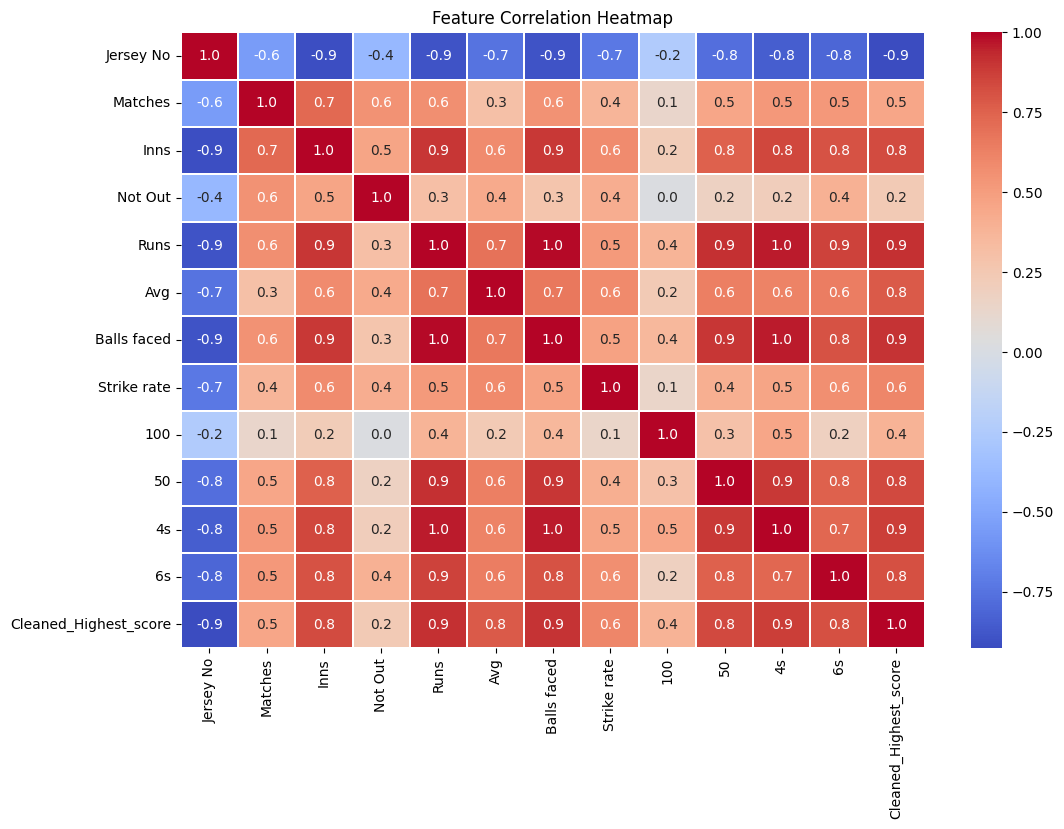

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df1.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.1)

# Set title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()


**Q8. Check the list of players who has an average greater than 50 as well strike rate above 120. Print player name, average and strike rate.**

In [24]:
players = df1[(df1["Avg"] > 50) & (df1["Strike rate"] > 120)][["Player", "Avg", "Strike rate"]]
players

,Player,Avg,Strike rate
0,KL Rahul,55.83,129.34
4,Ishan Kishan,57.33,145.76
31,Kieron Pollard,53.60,191.42
36,Wriddhiman Saha,71.33,139.86
37,Ruturaj Gaikwad,51.00,120.71
57,Deepak Hooda,101.00,142.25
60,Tom Curran,83.00,133.87


**Q9. Please check the list of players who has an average greater than 40 and balls faced above 100. Print player name, average and balls faced.**

In [25]:
listplayers = df1[(df1["Avg"] > 40) & (df1["Balls faced"] > 100)][["Player", "Avg", "Balls faced"]]
listplayers

,Player,Avg,Balls faced
0,KL Rahul,55.83,518
1,Shikhar Dhawan,44.14,427
4,Ishan Kishan,57.33,354
8,Virat Kohli,42.36,384
9,ABD Villiers,45.40,286
10,Faf Duplessis,40.81,319
14,Eoin Morgan,41.80,302
24,Kane Williamson,45.28,237
27,Chris Gayle,41.14,210
28,Ben Stokes,40.71,200


**Q10. Players who scored atleast one century in this season. Create visualization.**

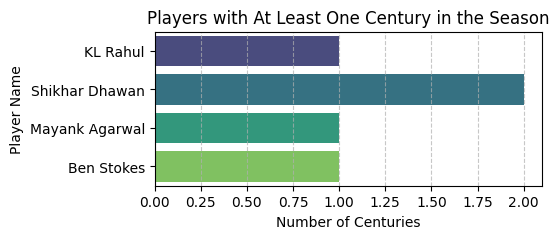

In [32]:
# Filter players who scored at least one century
century_scorers = df1[df1["100"] >= 1][["Player", "100"]]

# Plot the data
plt.figure(figsize=(5, 2))
sns.barplot(x="100", y="Player", hue="Player", data=century_scorers, palette="viridis", dodge=False, legend=False)

# Add labels and title
plt.xlabel("Number of Centuries")
plt.ylabel("Player Name")
plt.title("Players with At Least One Century in the Season")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


**Q11. Players who scored atleast 4 half centuries in this season.**

In [33]:
half_centurier = df1[df1["50"] >= 4][["Player", "50"]]
half_centurier

,Player,50
0,KL Rahul,5
1,Shikhar Dhawan,4
2,David Warner,4
4,Ishan Kishan,4
5,Quinton Kock,4
6,Suryakumar Yadav,4
7,Devdutt Padikkal,5
9,ABD Villiers,5
10,Faf Duplessis,4


**Q12. Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.**

In [34]:
boundary_six_hitplayers = df1[(df1["4s"] > 45) & (df1["6s"] > 10)][["Player", "4s", "6s"]]
boundary_six_hitplayers

,Player,4s,6s
0,KL Rahul,58,23
1,Shikhar Dhawan,67,12
2,David Warner,52,14
5,Quinton Kock,46,22
6,Suryakumar Yadav,61,11


**Q13. Plot a histogram of number of matches played in a season by players.**

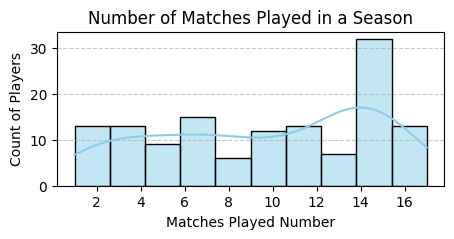

In [39]:
# Plot the histogram for the number of matches played by players
plt.figure(figsize=(5, 2))
sns.histplot(df1["Matches"], bins=10, kde=True, color="skyblue")

# Add labels and title
plt.xlabel("Matches Played Number")
plt.ylabel("Count of Players")
plt.title("Number of Matches Played in a Season")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


**Q14. Plot the histogram of balls faced by players.**

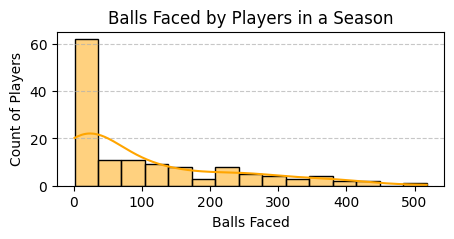

In [40]:
# Plot the histogram for the number of balls faced by players
plt.figure(figsize=(5, 2))
sns.histplot(df1["Balls faced"], bins=15, kde=True, color="orange")

# Add labels and title
plt.xlabel("Balls Faced")
plt.ylabel("Count of Players")
plt.title("Balls Faced by Players in a Season")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


**Q15. Top 10 players with most runs in a season.**

In [41]:
top_players = df1.nlargest(10, "Runs")[["Player", "Runs"]]
top_players

,Player,Runs
0,KL Rahul,670
1,Shikhar Dhawan,618
2,David Warner,548
3,Shreyas Iyer,519
4,Ishan Kishan,516
5,Quinton Kock,503
6,Suryakumar Yadav,480
7,Devdutt Padikkal,473
8,Virat Kohli,466
9,ABD Villiers,454


**Q16. Print the players who played the match but didn't get the batting.**

In [42]:
Didnot_get_bat = df1[(df1["Matches"] > 0) & (df1["Balls faced"] == 0)][["Player", "Matches", "Balls faced"]]
Didnot_get_bat

,Player,Matches,Balls faced


**Q17. Create a new column to show the percentage of total runs scored in 4s and 6s. Then print the top 5 players with maximum percentage.**

In [44]:
df1["percentage of total"] = ((df1["4s"] * 4 + df1["6s"] * 6) / df1["Runs"]) * 100
top_scorers = df1.nlargest(5, "percentage of total")[["Player", "percentage of total"]]
top_scorers

,Player,percentage of total
109,Andrew Tye,100.000000
48,Andre Russell,76.923077
74,Chris Morris,76.470588
29,Hardik Pandya,73.309609
47,Sunil Narine,72.727273


**Q18. Print the players with top 5 Not out percentages (Not Out percentage can be calculated as number of Not outs divided by Innings).**

In [48]:
# Create a new column for Not Out percentage
df1["Not Out percentage"] = (df1["Not Out"] / df1["Inns"]) * 100

# Get the top 5 players with the highest Not Out percentage
top_not_out_players = df1.nlargest(5, "Not Out percentage")[["Player", "Not Out percentage"]]

# Display the result
top_not_out_players


,Player,Not Out percentage
62,Gurkeerat Singh,100.0
68,Lockie Ferguson,100.0
93,Imran Tahir,100.0
97,Mohammad Nabi,100.0
105,Pravin Dubey,100.0


**Q19. Create visualization of top 10 players with highest number of sixes.**

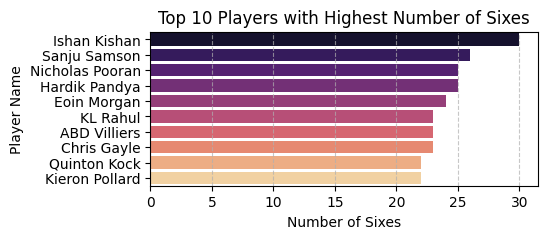

In [51]:
# Get the top 10 players with the highest number of sixes
top_player = df1.nlargest(10, "6s")[["Player", "6s"]]

# Plot the data
plt.figure(figsize=(5, 2))
sns.barplot(x="6s", y="Player", hue="Player", data=top_player, palette="magma", dodge=False, legend=False)

# Add labels and title
plt.xlabel("Number of Sixes")
plt.ylabel("Player Name")
plt.title("Top 10 Players with Highest Number of Sixes")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


**Q20. Scatter plot of runs scored by a player v/s balls faced in a season. Then find the relationship between these 2 variables.**

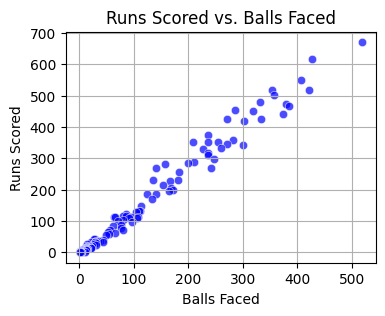

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(4, 3))
sns.scatterplot(x=df1["Balls faced"], y=df1["Runs"], alpha=0.7, color="blue")

# Add labels and title
plt.xlabel("Balls Faced")
plt.ylabel("Runs Scored")
plt.title("Runs Scored vs. Balls Faced")
plt.grid(True)

# Show plot
plt.show()
